In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

AttributeError: module '_pywrap_tensorflow_internal' has no attribute 'TF_ListPhysicalDevices'

In [9]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
zip_file = tf.keras.utils.get_file(origin=_URL, 
                                   fname="flower_photos.tgz", 
                                   extract=True)
base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

In [10]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [11]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [12]:
round(len(images)*0.8)

639

In [13]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [15]:
batch_size = 100
IMG_SHAPE = 150 

In [16]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size, 
                                                directory=train_dir, 
                                                shuffle=True, 
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 2935 images belonging to 5 classes.


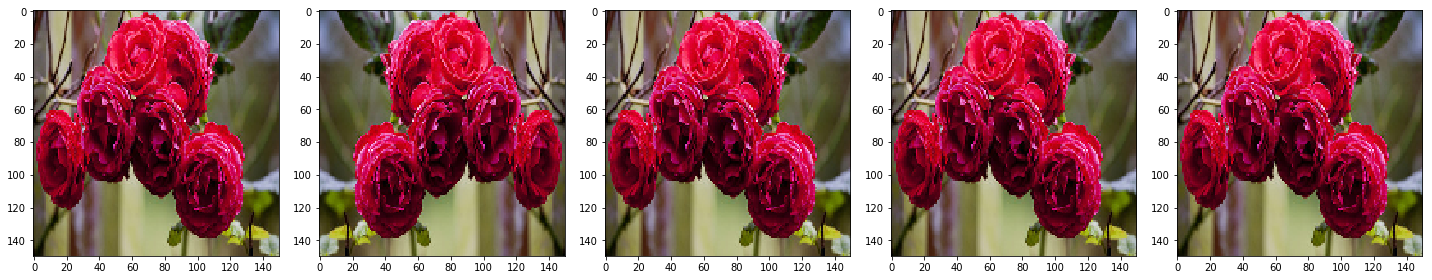

In [18]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [19]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


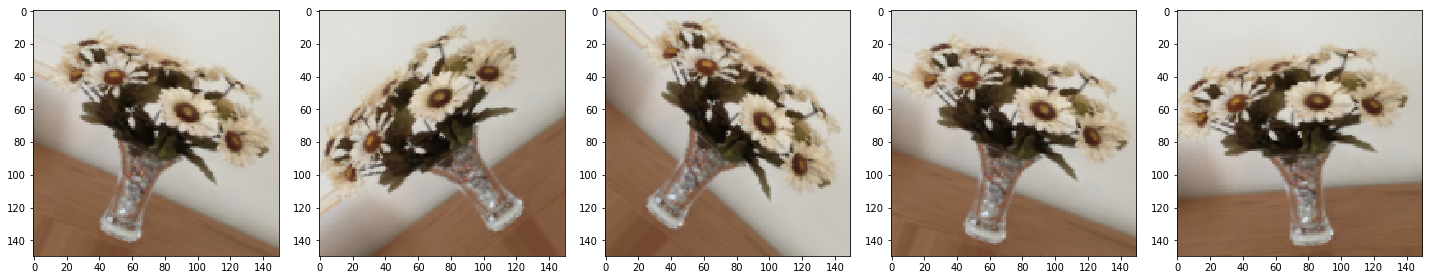

In [20]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [21]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size, 
                                                directory=train_dir, 
                                                shuffle=True, 
                                                target_size=(IMG_SHAPE, IMG_SHAPE)
                                                )

Found 2935 images belonging to 5 classes.


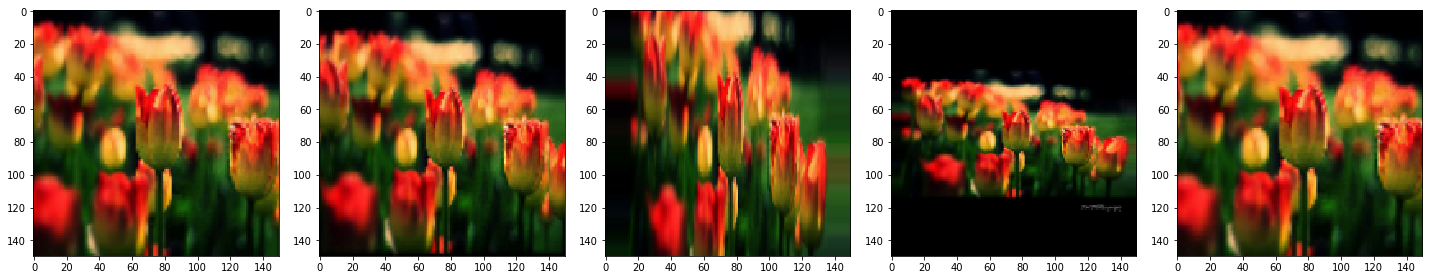

In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [23]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255, 
                    rotation_range=45, 
                    width_shift_range=.15, 
                    height_shift_range=.15, 
                    horizontal_flip=True, 
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size, 
                                                directory=train_dir, 
                                                shuffle=True, 
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 2935 images belonging to 5 classes.


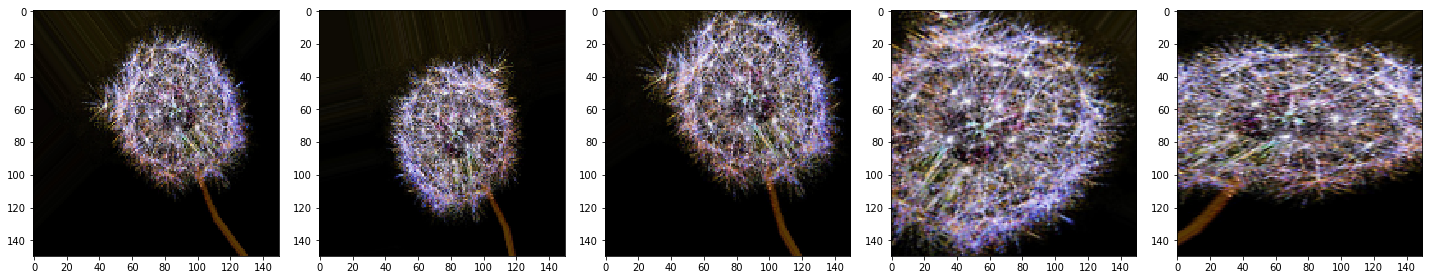

In [24]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [25]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size, 
                                                 directory=val_dir, 
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


In [29]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20736)             0         
__________

In [51]:
epochs = 50

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Epoch 1/50
30/30 [==============================] - 46s 2s/step - loss: 0.3431 - acc: 0.8753 - val_loss: 0.7734 - val_acc: 0.7578
Epoch 2/50
30/30 [==============================] - 54s 2s/step - loss: 0.3075 - acc: 0.8842 - val_loss: 0.7068 - val_acc: 0.7864
Epoch 3/50
30/30 [==============================] - 46s 2s/step - loss: 0.3201 - acc: 0.8763 - val_loss: 0.7959 - val_acc: 0.7741
Epoch 4/50
30/30 [==============================] - 50s 2s/step - loss: 0.2993 - acc: 0.8910 - val_loss: 0.7131 - val_acc: 0.7687
Epoch 5/50
30/30 [==============================] - 50s 2s/step - loss: 0.3196 - acc: 0.8845 - val_loss: 0.6959 - val_acc: 0.7701
Epoch 6/50
30/30 [==============================] - 50s 2s/step - loss: 0.2930 - acc: 0.8879 - val_loss: 0.7592 - val_acc: 0.7646
Epoch 7/50
30/30 [==============================] - 51s 2s/step - loss: 0.3023 - acc: 0.8845 - val_loss: 0.7198 - val_acc: 0.7728
Epoch 8/50
30/30 [==============================] - 50s 2s/step - loss: 0.3130 - acc: 0.88

Epoch 40/50
30/30 [==============================] - 50s 2s/step - loss: 0.2506 - acc: 0.9104 - val_loss: 0.8044 - val_acc: 0.7946
Epoch 41/50
30/30 [==============================] - 50s 2s/step - loss: 0.2512 - acc: 0.9090 - val_loss: 0.7836 - val_acc: 0.7741
Epoch 42/50
30/30 [==============================] - 51s 2s/step - loss: 0.2354 - acc: 0.9124 - val_loss: 0.7362 - val_acc: 0.7714
Epoch 43/50
30/30 [==============================] - 52s 2s/step - loss: 0.2448 - acc: 0.9148 - val_loss: 0.7394 - val_acc: 0.7932
Epoch 44/50
30/30 [==============================] - 51s 2s/step - loss: 0.2389 - acc: 0.9090 - val_loss: 0.8870 - val_acc: 0.7769
Epoch 45/50
30/30 [==============================] - 50s 2s/step - loss: 0.2753 - acc: 0.9012 - val_loss: 0.8131 - val_acc: 0.7891
Epoch 46/50
30/30 [==============================] - 50s 2s/step - loss: 0.2522 - acc: 0.9046 - val_loss: 0.7525 - val_acc: 0.7932
Epoch 47/50
30/30 [==============================] - 50s 2s/step - loss: 0.2367 - a

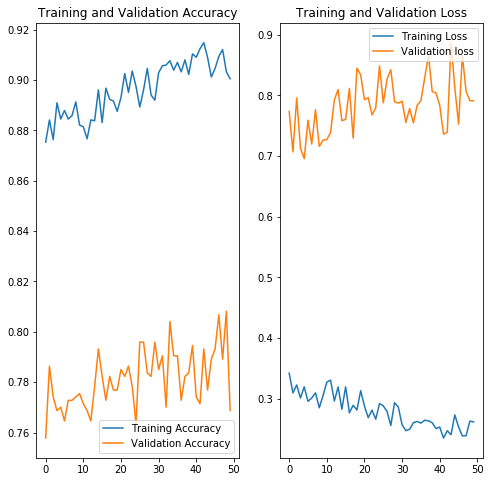

In [52]:
acc=history.history['acc']
val_acc=history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()